In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pylightcurve as plc
import numpy as np


###############################################################################################
##### Create a Planet object
###############################################################################################

# At first we need to  create a Planet object.
# Planets include in the ExoClock project (https://www.exoclock.space/database/planets)
# can be loaded automatically. 
# Alteranatively we can difine our custom Planet object (see notebook: The Planet class)

planet = plc.get_planet('WASP-39b')

###############################################################################################


exoclock: Checking ephemerides database...
exoclock: Checking catalogues database...
exoclock: Checking ut database...
pylightcurve: Checking exotethys database...
pylightcurve: Checking photometry database...


In [2]:
###############################################################################################
##### Load data
###############################################################################################

# Here we will combine all the data for WASP-39b from the previous notebooks.

data_ground = plc.open_dict('wasp39b_ground.pickle')
data_tess = plc.open_dict('wasp39b_tess.pickle')
data_hst = plc.open_dict('wasp39b_hst.pickle')
data_jwst = plc.open_dict('wasp39b_jwst.pickle')

###############################################################################################





###############################################################################################
##### Define the trend function
###############################################################################################

# Here we will combine all the trend function from the previous notebooks.

# Keep the default second order polynomial with time for JWST and TESS data.

# A fisrt order polynomial with airmass for the ground-based data:

data_ground['detrending_series'] = 'airmass'
data_ground['detrending_order'] = 1


# A linear with time in the observation (time - start of the observation) 
# and an exponential with orbital phase of HST (ophase in the auxiliary data) for the HST data.

def trend_function_hst(dictionary, c1, c2, c3):
    return (1.0 
            - c1 * (dictionary['time'] - min(dictionary['time']))
            - c2 * np.exp(- (10**c3) * dictionary['ophase'])
           )

data_hst['trend_function'] = trend_function_hst

trend_parameters_hst = [
    [0.01, -1, 1, 'ls', '$l_s$'],
    [0.01, -1, 1, 'sa', '$s_a$'],
    [2, 0, 5, 'sd', '$s_d$'],
]

data_hst['trend_parameters'] = trend_parameters_hst

###############################################################################################





###############################################################################################
##### Define the stellar model
###############################################################################################

# Here we will combine all the stellar models from the previous notebooks.

# Keep the default 'Pheonix_2018' models for all the datasets, except for the JWST.

data_jwst['stellar_model'] = 'Stagger_2018'

###############################################################################################





###############################################################################################
##### Add observation to the Planet object
###############################################################################################

# Then we are going to add the observation to the Planet object.
# It is advised to use planet.clear_observations() before, 
# to avoid duplications, in case we forget that we have already added the same observation.

planet.clear_observations()
planet.add_observation_from_dict(data_jwst)
planet.add_observation_from_dict(data_hst)
planet.add_observation_from_dict(data_tess)
planet.add_observation_from_dict(data_ground)

###############################################################################################


File already here...  teff5000.0_logg4.0_MH-0.5.pickle
File already here...  teff5000.0_logg4.0_MH0.0.pickle
File already here...  teff5000.0_logg4.5_MH-1.0.pickle
File already here...  teff5500.0_logg4.0_MH-0.5.pickle
File already here...  teff5500.0_logg4.0_MH0.0.pickle
File already here...  teff5500.0_logg4.5_MH-0.5.pickle
File already here...  teff5500.0_logg4.5_MH0.0.pickle
File already here...  teff5000.0_logg4.5_MH0.0.pickle


PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.



File already here...  teff05400_logg4.00_MH0.0.pickle
File already here...  teff05400_logg4.50_MH0.0.pickle


PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.



File already here...  teff05400_logg4.00_MH0.0.pickle
File already here...  teff05400_logg4.50_MH0.0.pickle


PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.



File already here...  teff05400_logg4.00_MH0.0.pickle
File already here...  teff05400_logg4.50_MH0.0.pickle

Observation:  obs0
Filter:  jwst_niriss1:8600.0-28000.0
Epoch:  715
Data-points excluded:  0
Scaling uncertainties by:  1

Observation:  obs1
Filter:  hst_wfc3_ir_g141:10880.0-16800.0
Epoch:  183
Data-points excluded:  0
Scaling uncertainties by:  1

Observation:  obs2
Filter:  TESS
Epoch:  694
Data-points excluded:  0
Scaling uncertainties by:  1

Observation:  obs3
Filter:  luminance
Epoch:  603
Data-points excluded:  0
Scaling uncertainties by:  1

Optimising initial parameters...
Transit fitting...


<IPython.core.display.Javascript object>


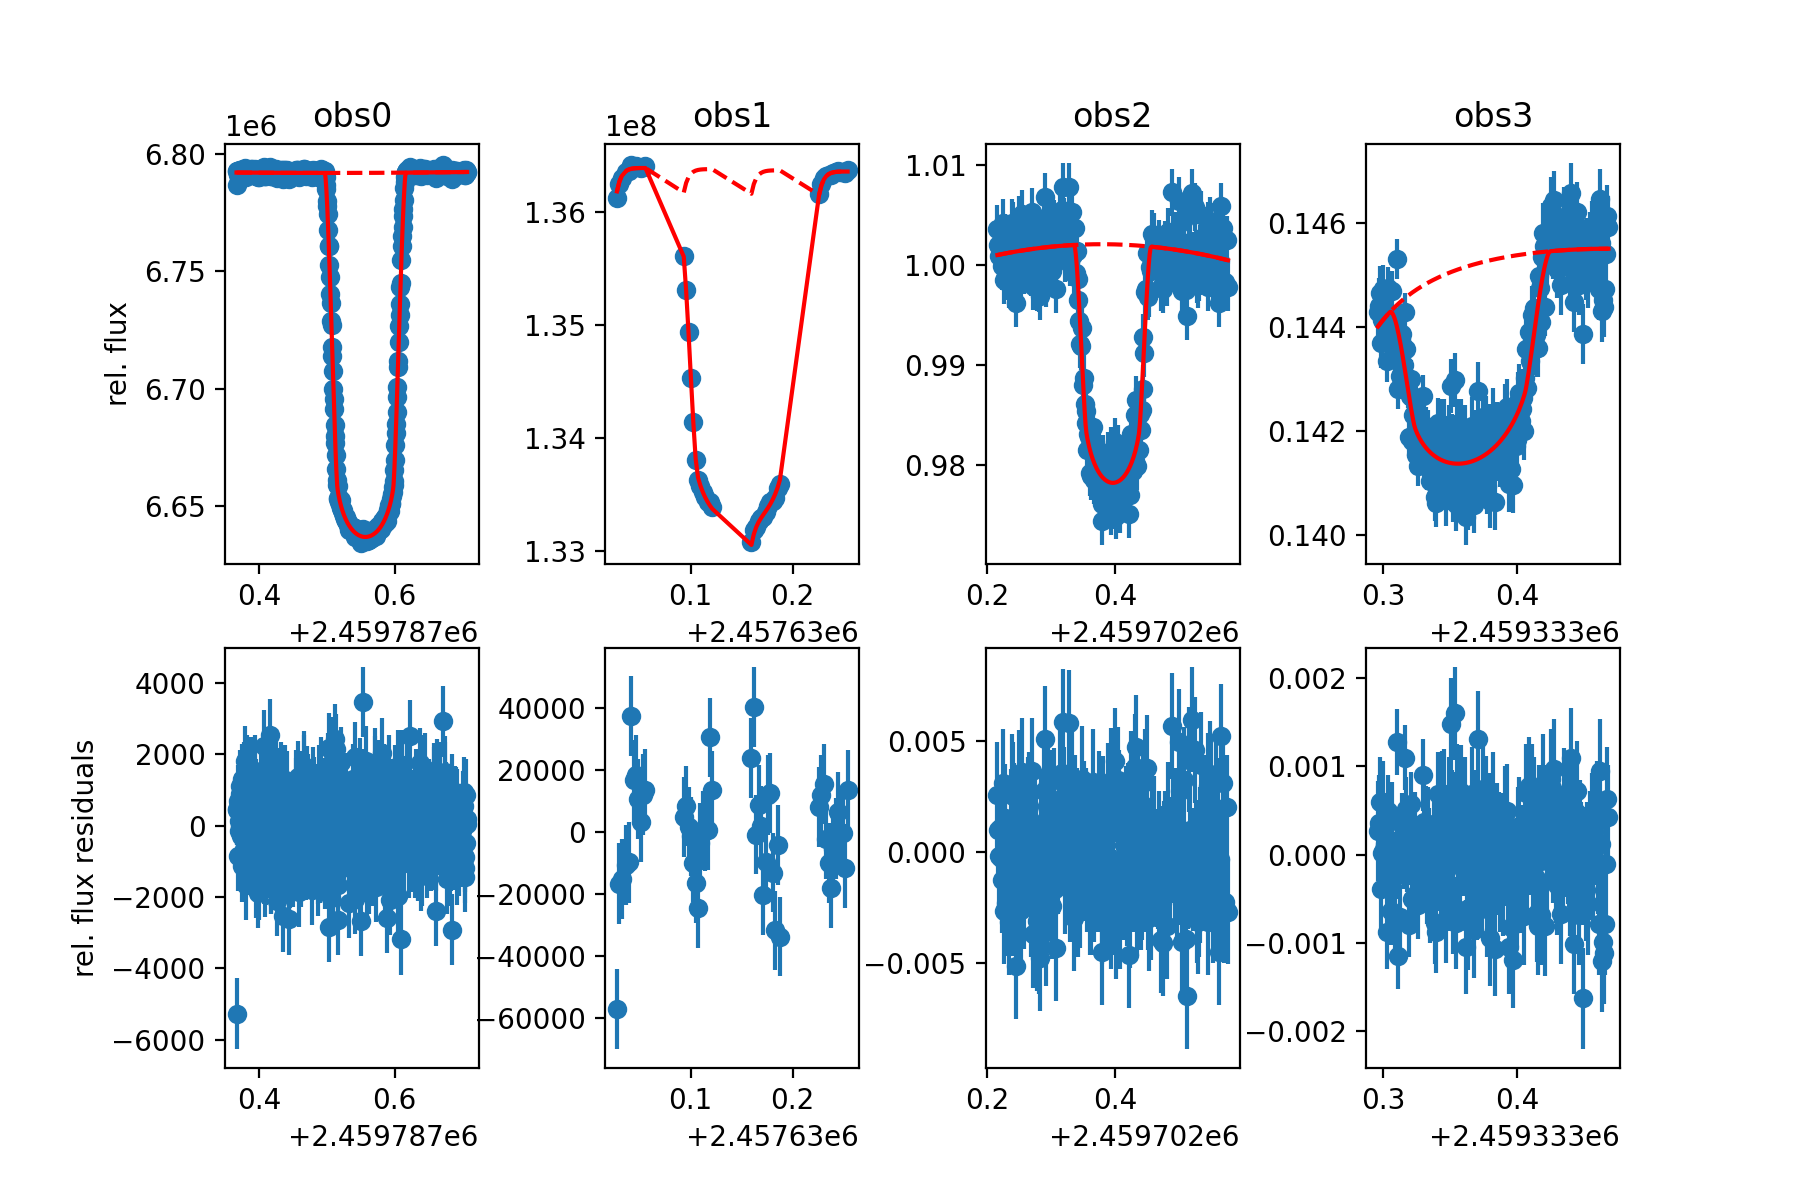


Observation:  obs0
Filter:  jwst_niriss1:8600.0-28000.0
Epoch:  715
Number of outliers removed:  0
Uncertainties scale factor:  1
Residuals statistics:
res_max_autocorr: 	 0.09444559330243092
res_max_autocorr_flag: 	 False
res_shapiro: 		 0.9874910712242126
res_shapiro_flag: 	 True
res_mean: 		 0.15052044680220678
res_std: 		 1007.5086516493709
res_rms: 		 1007.5086628931476
res_chi_sqr: 		 559.7568783948867
res_red_chi_sqr: 	 1.0423777996180386

Observation:  obs1
Filter:  hst_wfc3_ir_g141:10880.0-16800.0
Epoch:  183
Number of outliers removed:  0
Uncertainties scale factor:  1
Residuals statistics:
res_max_autocorr: 	 0.3769167864754675
res_max_autocorr_flag: 	 False
res_shapiro: 		 0.9712414741516113
res_shapiro_flag: 	 False
res_mean: 		 5.718265086704609
res_std: 		 17380.488741547208
res_rms: 		 17380.489682215655
res_chi_sqr: 		 92.38883972606875
res_red_chi_sqr: 	 1.8115458769817403

Observation:  obs2
Filter:  TESS
Epoch:  694
Number of outliers removed:  0
Uncertainties scal

In [3]:

###############################################################################################
##### Test the performance of the trend function 
###############################################################################################

# We can test the performance of the trend function with quick fit, using: 
# optimiser = 'curve_fit'.
# Here, the quality of the data is good enough to fit for the orbital parameters (sma and i):
# fit_sma_over_rs = True
# fit_inclination = True.

test = planet.transit_fitting(
    optimiser = 'curve_fit',
    fit_sma_over_rs=True, 
    fit_inclination=True,
)

###############################################################################################





###############################################################################################
##### Evaluate test results
###############################################################################################

# To evaluate the test results we can plot the raw data, trend function, and residuals like this:

observations = len(test['observations'])
plt.figure(figsize=(9,6))
for obs_n, obs_id in enumerate(test['observations']):
    observation = test['observations'][obs_id]
    plt.subplot(2, observations, obs_n + 1)
    plt.errorbar(observation['input_series']['time'], 
                 observation['input_series']['flux'], 
                 observation['input_series']['flux_unc'], 
                 fmt='o', zorder=0, label='raw data')
    plt.plot(observation['input_series']['time'], observation['output_series']['trend'], 'r--', zorder=1, 
             label='trend model')
    plt.plot(observation['input_series']['time'], observation['output_series']['model'], 'r-', zorder=1,
             label='trend + transit model'
            )
    if obs_n == 0:
        plt.ylabel('rel. flux')
    plt.title(obs_id)

    plt.subplot(2, observations, observations + obs_n + 1)
    plt.errorbar(observation['input_series']['time'], 
                 observation['output_series']['residuals'], 
                 observation['input_series']['flux_unc'], 
                 fmt='o', zorder=0)
    if obs_n == 0:
        plt.ylabel('rel. flux residuals')
    
plt.subplots_adjust(wspace=0.5, hspace=0.2)

    
    
# And also print the residuals diagnostics like this:

for obs_n, obs_id in enumerate(test['observations']):
    observation = test['observations'][obs_id]
    print('')
    print('Observation: ', obs_id)
    print('Filter: ', observation['model_info']['filter_id'])
    print('Epoch: ', observation['model_info']['epoch'])
    print('Number of outliers removed: ', observation['data_conversion_info']['outliers'])
    print('Uncertainties scale factor: ', observation['data_conversion_info']['scale_factor'])

    print('Residuals statistics:')
    print('res_max_autocorr:', '\t', observation['statistics']['res_max_autocorr'])
    print('res_max_autocorr_flag:', '\t', observation['statistics']['res_max_autocorr_flag'])
    print('res_shapiro:', '\t\t', observation['statistics']['res_shapiro'])
    print('res_shapiro_flag:', '\t', observation['statistics']['res_shapiro_flag'])
    print('res_mean:', '\t\t', observation['statistics']['res_mean'])
    print('res_std:', '\t\t', observation['statistics']['res_std'])
    print('res_rms:', '\t\t', observation['statistics']['res_rms'])
    print('res_chi_sqr:', '\t\t', observation['statistics']['res_chi_sqr'])
    print('res_red_chi_sqr:', '\t', observation['statistics']['res_red_chi_sqr'])
    
###############################################################################################


In [4]:

###############################################################################################
##### MCMC fit
###############################################################################################

# If the residuals diagniostics look ok, we can run the MCMC.
# Here we will define the 'output_folder', so that all the results and plots are saved.
# We don't need to defile the optimiser, as the default one is 'mcmc'.
# It is also better to use filter_outliers=True to clear the outliers and 
# and scale_uncertainties=True to scale the errorbars to match the residuals rms.

final = planet.transit_fitting(
    output_folder = 'wasp39b_comb',
    fit_sma_over_rs=True, 
    fit_inclination=True,
    filter_outliers=True,
    scale_uncertainties=True,
)

# By default, the number of iterations is 5000 and the burn in is 1000.
# If the chains do not converge, we can increase these number, for example by setting:
# iterations = 10000
# burn_in = 5000

###############################################################################################



Observation:  obs0
Filter:  jwst_niriss1:8600.0-28000.0
Epoch:  715
Data-points excluded:  5
Scaling uncertainties by:  0.9587710242466524

Observation:  obs1
Filter:  hst_wfc3_ir_g141:10880.0-16800.0
Epoch:  183
Data-points excluded:  1
Scaling uncertainties by:  1.0471186495881333

Observation:  obs2
Filter:  TESS
Epoch:  694
Data-points excluded:  0
Scaling uncertainties by:  0.9827348743120348

Observation:  obs3
Filter:  luminance
Epoch:  603
Data-points excluded:  2
Scaling uncertainties by:  1.0962105114475804

Optimising initial parameters...
Transit fitting: 5000 / 5000 , time left: 0:00:00, time elapsed: 1:18:11, total time: 1:18:11
